In [ ]:
!pip install numpy
!pip install tensorflow
!pip install matplotlib
!pip install tensorflow_datasets

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# 데이터셋 불러오기
train_dataset = tfds.load('iris', split='train[:80%]')
valid_dataset = tfds.load('iris', split='train[80%:]')

In [ ]:
# one hot encoding 처리 (데이터 전처리)
# https://www.tensorflow.org/datasets/catalog/iris
# 데이터 정보를 보면, y(레이블) 클래스가 3개임. one hot 처리 후 형태는 [1, 0, 0], [0, 1, 0], [0, 0, 1]
def preprocessing(data):
  x = data['features']
  y = data['label']
  y = tf.one_hot(y, 3)
  return x, y
batch_size = 10
train_data = train_dataset.map(preprocessing).batch(batch_size)
valid_data = valid_dataset.map(preprocessing).batch(batch_size)


In [ ]:
# 데이터 확인
for batch in train_data.take(1):
    print(batch[0])
    print(batch[1])

In [ ]:
model = tf.keras.models.Sequential([
                                    Dense(512, activation='relu', input_shape=(4,)),
                                    Dense(256, activation='relu'),
                                    Dense(128, activation='relu'),
                                    Dense(64, activation='relu'),
                                    Dense(32, activation='relu'),
                                    Dense(3, activation='softmax'),
])
# https://keras.io/ko/optimizers/
#
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# 학습 하며 가장 좋은 점수의 모델을 checkpoint에 저장하기 위함

checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only = True,
                             save_best_only = True,
                             monitor = 'val_loss',
                             verbose = 1)

In [ ]:
# model.fit -> 학습.
# history는 학습 epoch마다 loss, acc를 저장
history = model.fit(train_data,
                    validation_data = (valid_data),
                    epochs = 20,
                    callbacks = [checkpoint])

In [ ]:
# val_loss가 가장 좋은 모델 불러오기
model.load_weights(checkpoint_path)

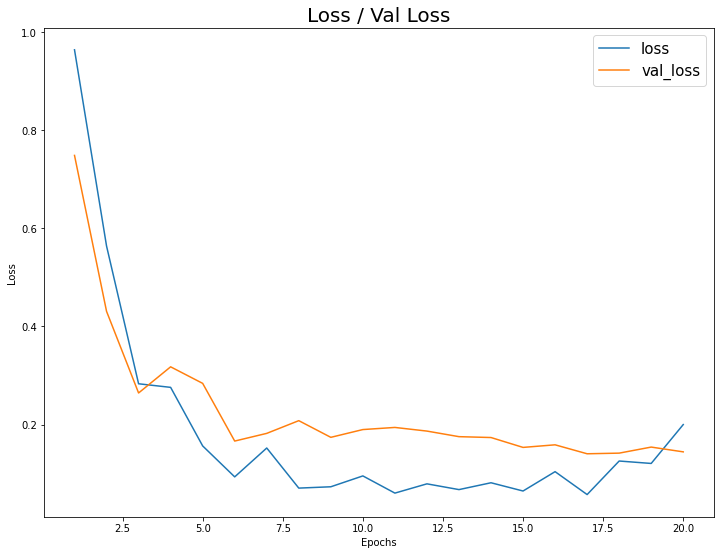

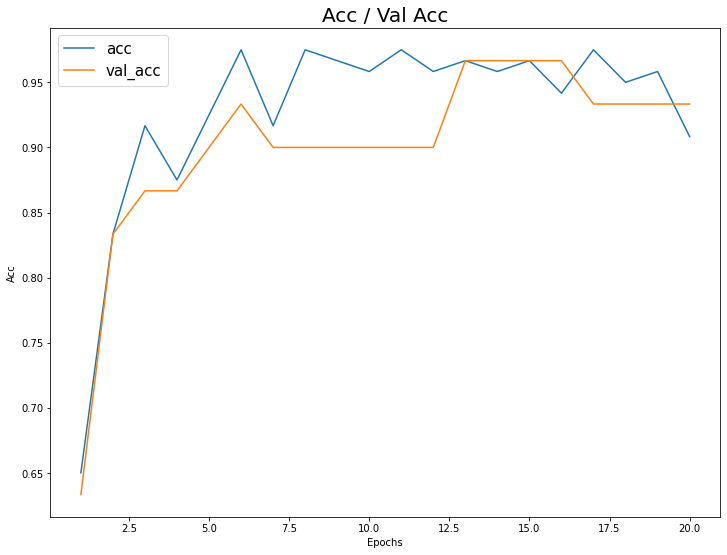

In [ ]:
# 모델 학습 과정 시각화

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['loss'])
plt.plot(np.arange(1, 21), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['acc'])
plt.plot(np.arange(1, 21), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()

In [ ]:
# 하나 테스트

d = np.array([[5.1, 3.4, 1.5, 0.2]])
model.predict(d)

1/1 [==============================] - 0s 26ms/step


array([[9.9980813e-01, 1.9194566e-04, 6.3940728e-09]], dtype=float32)